***
# `Project:` Prevendo a <font color='blue'>morte</font> ou <font color='blue'>vida</font> de pacientes com hepatite

## `Date:` fevereiro, 2022

## `Data Scientist:` Walter Trevisan
***

# `Preparação dos Dados-Etapa 4`

Nesta etapa, vamos realizar a **`Preparação dos Dados`** dos dados, utilizando os *dataframes* de treinamento e teste que foram salvos nos arquivos **`train_set.pkl`** e **`strat_test_set.pkl`** respectivamente.

Então, vamos realizar as seguintes atividades:

1. **Carregar** o *object* utilizado no processo de **imputação multivariada**, salvo no arquivo **`imputer_mv.pkl`**;

2. **Carregar** o *object* utilizado no processo de **imputação univariada**, salvo no arquivo **`imputer_cat.pkl`**;

3. **Carregar** e **preparar** o *dataframe* de treinamento, salvo no arquivo **`train_set.pkl`**;

4. **Carregar** e **preparar** o *dataframe* de teste, salvo no arquivo **`strat_test_set.pkl`**;

5. **Realizar** **`Feature Engineering`** para preparar os dados de acordo com alguns cenários (versões) definidos para a etapa de *modelagem*;

6. **Salvar** os *dataframes* com os dados de treinamento e teste, de acordo com alguns cenários (versões) definidos para a etapa de *modelagem*.

## Setup:

Primeiro, vamos carregar os **pacotes e funções** que serão utilizadas neste **notebook**.

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Importa função para verificarmos a versão da linguagem python:
from platform import python_version

# Importando o pacote NumPy:
import numpy as np
# Importando o pacote Pandas:
import pandas as pd
# Importando o pacote Scipy:
import scipy

# Importando o pacote do Scikit-Learn:
import sklearn as skl
# Funções para tratamento de outliers:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
# Define o "seed" para reproduzir os mesmos resultados no tratamento
# de valores ausentes para as variáveis numéricas:
SEED = 42

# Importando pacotes para visualização de gráficos:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importa o pacote "seaborn" para criarmos gráficos estatísticos:
import seaborn as sns
%matplotlib inline

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Gráficos, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
ROOT_DIR = "."

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
OBJ_PATH = os.path.join(ROOT_DIR, "objects")
# Criando o diretório, se ele não existir:
os.makedirs(OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "objetos" (Data Frames) do Projeto:
DATA_PATH = os.path.join(ROOT_DIR, "data")
# Criando o diretório, se ele não existir:
os.makedirs(DATA_PATH, exist_ok=True)

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) do Projeto:
GRAPHICS_PATH = os.path.join(ROOT_DIR, "images", "graphics")
# Criando o diretório, se ele não existir:
os.makedirs(GRAPHICS_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
LIB_PATH = os.path.join(ROOT_DIR, "library")

# Adicionando o diretório "./library" ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "data_science_library.py":
import data_science_library as dslib

# Importando para este notebook, as classes e funções definidas no módulo "plot_library.py":
import plot_library as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "project_library.py":
import project_library as pjlib

# Criando um objeto para calularmos o tempo gasto no processo de "imputação múltipla"
# das variáveis numéricas:
ept = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
print("Versões dos pacotes usados neste jupyter notebook:")
print("Python      : {}".format(python_version()))
print("Numpy       : {}".format(np.__version__))
print("Pandas      : {}".format(pd.__version__))
print("Scipy       : {}".format(scipy.__version__))
print("Matplotlib  : {}".format(mpl.__version__))
print("Seaborn     : {}".format(sns.__version__))
print("Scikit-Learn: {}".format(skl.__version__))

Versões dos pacotes usados neste jupyter notebook:
Python      : 3.8.12
Numpy       : 1.19.5
Pandas      : 1.3.5
Scipy       : 1.7.3
Matplotlib  : 3.4.3
Seaborn     : 0.11.2
Scikit-Learn: 1.0.2


## <font color='blue'>1- Carregar o *objeto* para imputação multivariada: `imputer_mv.pkl`</font>

In [3]:
# Carregando o objeto "imputer_mv" do processo de "imputação multivariada" para tratamento dos
# valores ausentes:
imputer_mv = dslib.pickle_object_load(
    path=OBJ_PATH, file="imputer_mv.pkl",
    msg="O arquivo 'imputer_mv.pkl' (objeto) foi carregado com sucesso!"
)

O arquivo 'imputer_mv.pkl' (objeto) foi carregado com sucesso!


## <font color='blue'>2- Carregar o *objeto* para imputação univariada: `imputer_cat.pkl`</font>

In [4]:
# Carregando o objeto "imputer_cat" do processo de "imputação univariada":
imputer_cat = dslib.pickle_object_load(
    path=OBJ_PATH, file="imputer_cat.pkl",
    msg="O arquivo 'imputer_cat.pkl' (objeto) foi carregado com sucesso!"
)

O arquivo 'imputer_cat.pkl' (objeto) foi carregado com sucesso!


## <font color='blue'>3- Carregar e preparar o *dataframe* de treinamento: `train_set.pkl`</font>

In [5]:
# Carregando o objeto (data frame) "train_set" (dados de treino):
train_df = dslib.pickle_object_load(
    path=DATA_PATH, file="train_set.pkl",
    msg="O arquivo 'train_set.pkl' (data frame) foi carregado com sucesso!"
)

O arquivo 'train_set.pkl' (data frame) foi carregado com sucesso!


In [6]:
# Definindo a variável "target" (Class):
target_variable = ['Class']
# Criando um dataframe apenas com a variável target:
train_target_df = train_df[target_variable].copy(deep=True)

# Definindo as variáveis categóricas preditoras:
cat_variables = ['Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm',
                 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
# Criando um dataframe apenas com as variáveis categóricas:
train_cat_df = train_df[cat_variables].copy(deep=True)
# Definindo as variáveis numéricas:
num_variables = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']
# Criando um dataframe apenas com as variáveis numéricas:
train_num_df = train_df[num_variables].copy(deep=True)

In [7]:
# Aplicando o método "encoding" nas variáveis categóricas:
train_cat_df = pjlib.method_encoding_categorical(
    df=pd.concat(
        [train_target_df, train_cat_df],
        axis=1
    ),
    target=True
)
# Resumo do dataframe:
train_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Class           123 non-null    int64
 1   Gender          123 non-null    int64
 2   Steroid         123 non-null    int64
 3   Antivirals      123 non-null    int64
 4   Fatigue         123 non-null    int64
 5   Malaise         123 non-null    int64
 6   Anorexia        123 non-null    int64
 7   LiverBig        123 non-null    int64
 8   LiverFirm       123 non-null    int64
 9   SpleenPalpable  123 non-null    int64
 10  Spiders         123 non-null    int64
 11  Ascites         123 non-null    int64
 12  Varices         123 non-null    int64
 13  Histology       123 non-null    int64
dtypes: int64(14)
memory usage: 13.6 KB


In [8]:
# Mostrando os primeiros registros:
train_cat_df.head(10)

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology
0,0,0,0,1,0,0,1,1,0,1,0,0,0,1
1,1,0,0,0,1,1,1,0,0,1,1,1,1,0
2,1,1,0,1,0,0,0,0,0,0,0,1,1,0
3,1,1,0,0,1,1,1,1,0,1,1,1,1,0
4,1,1,1,1,0,1,1,1,0,1,0,1,1,0
5,1,0,0,1,0,1,1,0,1,1,1,1,1,0
6,1,1,1,0,0,1,1,1,1,1,1,1,1,0
7,1,0,1,1,1,1,1,1,1,1,1,1,1,0
8,1,0,1,1,1,1,1,1,1,1,1,1,1,1
9,1,0,0,1,0,0,0,1,1,1,1,1,1,0


## <font color='blue'>4- Carregar e preparar o *dataframe* de teste: `strat_test_set.pkl`</font>

In [9]:
# Carregando o objeto (data frame) "strat_test_set" (dados de teste):
test_df = dslib.pickle_object_load(
    path=DATA_PATH, file="strat_test_set.pkl",
    msg="O arquivo 'strat_test_set.pkl' (data frame) foi carregado com sucesso!"
)

O arquivo 'strat_test_set.pkl' (data frame) foi carregado com sucesso!


### Preparando as variáveis categóricas e numéricas

In [10]:
# Preparando as variáveis categóricas e numéricas dos dados de teste:
test_df = pjlib.data_prep_step_1(df=test_df, target=True)

### Tratando os valores ausentes das variáveis categóricas

In [11]:
# Separando a variável "target" em um dataframe:
test_target_df = test_df[target_variable].copy(deep=True)
# Separando as variáveis "categóricas" preditoras em um outro dataframe:
test_cat_df = test_df[cat_variables].copy(deep=True)
# Substituindo os valores ausentes:
test_cat_tf = imputer_cat.transform(test_cat_df.values)
# Remontando o dataframe original sem os valores ausentes:
test_cat_df = pd.concat(
    [test_target_df,
     pd.DataFrame(test_cat_tf, columns=cat_variables)
    ],
    axis=1
)
# Verificando se os "missing values" foram removidos:
df_mv = dslib.missing_values(data=test_cat_df, axis=0, threshold=0.01, target='Class')
print('Quantidade de variáveis: {}'.format(len(df_mv)))
df_mv

Quantidade de variáveis: 0


Attributes (Columns),Total,Percent


### Aplicando o método *`encoding`* nas variáveis `categóricas`

Entretanto, primeiro precisamos preparar as variáveis categóricas (preditivas) para serem utilizadas no processo de imputação mútipla. Então, utilizaremos a mesma técnica chamada **encoding** para preparar as variáveis categóricas nos dados de teste.

In [12]:
# Aplicando o método "encoding" nas variáveis categóricas:
test_cat_df = pjlib.method_encoding_categorical(test_cat_df, target=True)
# Resumo do dataframe:
test_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Class           31 non-null     int64
 1   Gender          31 non-null     int64
 2   Steroid         31 non-null     int64
 3   Antivirals      31 non-null     int64
 4   Fatigue         31 non-null     int64
 5   Malaise         31 non-null     int64
 6   Anorexia        31 non-null     int64
 7   LiverBig        31 non-null     int64
 8   LiverFirm       31 non-null     int64
 9   SpleenPalpable  31 non-null     int64
 10  Spiders         31 non-null     int64
 11  Ascites         31 non-null     int64
 12  Varices         31 non-null     int64
 13  Histology       31 non-null     int64
dtypes: int64(14)
memory usage: 3.5 KB


In [13]:
# Mostrando os primeiros registros:
test_cat_df.head(10)

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology
0,1,0,1,1,0,1,1,1,0,0,0,1,0,1
1,1,0,1,1,0,0,0,0,0,0,0,1,1,0
2,1,0,0,1,0,0,1,1,1,1,1,0,1,1
3,0,0,0,1,0,0,0,0,0,1,0,1,1,1
4,1,0,0,0,1,1,1,1,1,1,1,1,1,0
5,1,0,0,0,1,1,1,1,1,1,1,1,1,0
6,1,0,1,1,1,1,1,1,1,1,1,1,1,0
7,1,0,1,1,1,1,1,1,1,1,1,1,1,0
8,0,0,0,1,0,0,0,1,1,0,0,1,0,1
9,1,0,1,1,1,1,1,1,1,1,1,1,1,0


### Tratando os valores ausentes das variáveis numéricas

In [14]:
# Criando um dataframe apenas com as variáveis numéricas:
test_num_df = test_df[num_variables].copy(deep=True)
# Verificando variáveis com valores iguais a "0":
# Criando um índice de todos os valores iguais a "0":
index = test_num_df.values == 0
test_num_df.loc[index,:]

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime


**Análise:** podemos observar que não temos variáveis com valores iguais a **zero**.

In [15]:
# Verificando as variáveis com "missing values":
df_mv = dslib.missing_values(data=test_num_df, axis=0, threshold=0.01, target=None)
print('Quantidade de variáveis: {}'.format(len(df_mv)))
df_mv

Quantidade de variáveis: 5


Attributes (Columns),Total,Percent
Protime,14,0.451613
AlkPhosphate,6,0.193548
Albumin,4,0.129032
Bilirubin,1,0.032258
SGOT,1,0.032258


Temos **5 variáveis** com valores ausentes (`NaN`). Portanto, para o tratamento desses valores ausentes utilizaremos o mesmo método da **imputação múltipla** que foi aplicado nos dados de treino.

In [16]:
# Preparando um dataframe para aplicarmos a "imputação múltipla":
var_num_df = pd.concat([test_cat_df[cat_variables], test_num_df], axis=1)
# Verificando o shape:
var_num_df.shape

(31, 19)

In [17]:
# Aplicando a imputação múltipla:
data_imp_tf = imputer_mv.transform(var_num_df)

In [18]:
# Salva os valores ausentes tratados no mesmo dataframe:
var_num_df = pd.DataFrame(data_imp_tf, columns = var_num_df.columns)

# Resumo das informações:
var_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          31 non-null     float64
 1   Steroid         31 non-null     float64
 2   Antivirals      31 non-null     float64
 3   Fatigue         31 non-null     float64
 4   Malaise         31 non-null     float64
 5   Anorexia        31 non-null     float64
 6   LiverBig        31 non-null     float64
 7   LiverFirm       31 non-null     float64
 8   SpleenPalpable  31 non-null     float64
 9   Spiders         31 non-null     float64
 10  Ascites         31 non-null     float64
 11  Varices         31 non-null     float64
 12  Histology       31 non-null     float64
 13  Age             31 non-null     float64
 14  Bilirubin       31 non-null     float64
 15  AlkPhosphate    31 non-null     float64
 16  SGOT            31 non-null     float64
 17  Albumin         31 non-null     float

In [19]:
# Refazendo o dataframe com todos os valores ausentes tratados nas variáveis numéricas:
test_num_df = var_num_df[num_variables].copy(deep=True)

# Verificando se todos os valores ausentes foram tratados:
df_mv = dslib.missing_values(data=test_num_df, target=None)
print('Quantidade de variáveis: {}'.format(len(df_mv)))
df_mv

Quantidade de variáveis: 6


Attributes (Columns),Total,Percent
Age,0,0.0
Bilirubin,0,0.0
AlkPhosphate,0,0.0
SGOT,0,0.0
Albumin,0,0.0
Protime,0,0.0


### Preparando o *dataset* final dos dados de teste

In [20]:
# Criando o dataframe de teste:
test_set = pd.concat([test_cat_df, test_num_df], axis=1)
# Resumo do dataframe:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           31 non-null     int64  
 1   Gender          31 non-null     int64  
 2   Steroid         31 non-null     int64  
 3   Antivirals      31 non-null     int64  
 4   Fatigue         31 non-null     int64  
 5   Malaise         31 non-null     int64  
 6   Anorexia        31 non-null     int64  
 7   LiverBig        31 non-null     int64  
 8   LiverFirm       31 non-null     int64  
 9   SpleenPalpable  31 non-null     int64  
 10  Spiders         31 non-null     int64  
 11  Ascites         31 non-null     int64  
 12  Varices         31 non-null     int64  
 13  Histology       31 non-null     int64  
 14  Age             31 non-null     float64
 15  Bilirubin       31 non-null     float64
 16  AlkPhosphate    31 non-null     float64
 17  SGOT            31 non-null     float

## <font color='blue'>5- Realizar *`Feature Engineering`*</font>

Agora, vamos trabalhar com ***Feature Engineering*** para criarmos algumas versões dos *dados de treino* para serem utilizados na etapa de modelagem, a saber:
* **`Versão 1`**: nesta versão vamos manter os dados originais sem nenhum tratamento adicional;

* **`Versão 2`**: nesta versão vamos tratar e **remover os outliers** existentes nas variáveis numéricas.

### 5.1- `Versão 1`:

* Nesta versão vamos manter os dados originais, ou seja, sem nenhum tratamento adicional nos **dados de treino**.

### Dados de treino: `train_set_v1`

In [21]:
# Criando o dataframe de treino:
train_set_v1 = pd.concat([train_cat_df, train_num_df], axis=1)
# Resumo do dataframe:
train_set_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           123 non-null    int64  
 1   Gender          123 non-null    int64  
 2   Steroid         123 non-null    int64  
 3   Antivirals      123 non-null    int64  
 4   Fatigue         123 non-null    int64  
 5   Malaise         123 non-null    int64  
 6   Anorexia        123 non-null    int64  
 7   LiverBig        123 non-null    int64  
 8   LiverFirm       123 non-null    int64  
 9   SpleenPalpable  123 non-null    int64  
 10  Spiders         123 non-null    int64  
 11  Ascites         123 non-null    int64  
 12  Varices         123 non-null    int64  
 13  Histology       123 non-null    int64  
 14  Age             123 non-null    float64
 15  Bilirubin       123 non-null    float64
 16  AlkPhosphate    123 non-null    float64
 17  SGOT            123 non-null    flo

### 5.2- `Versão 2`:

* Nesta versão vamos tratar e **remover os outliers** existentes nas variáveis numéricas nos **dados de treino**.

### Análise dos `outliers` das variáveis *numéricas* com o método `MAD`.

O método do desvio absoluto mediano (MAD = Median Absolute Deviation) substitui a média e o desvio padrão por estatísticas mais robustas, como a mediana e o desvio absoluto mediano.

In [22]:
# Primeiro, vamos criar um dataframe temporário:
data_num_out_df = train_num_df.copy(deep=True)

# Cria um dicionário onde serão armazenados os "outliers":
outliers_mad = {}

# Define as variáveis onde aplicaremos o método "MAD":
variables=['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']

# Aplica o método "MAD" em cada variável:
for var in variables:
    outliers_mad[var] = dslib.mad_method(data_num_out_df, var)

# Visualizando a quantidade de "outliers" em cada variável:
for var in variables:
    print("Outliers ({}): {}".format(var, len(outliers_mad[var])))

Outliers (Age): 0
Outliers (Bilirubin): 14
Outliers (AlkPhosphate): 7
Outliers (SGOT): 11
Outliers (Albumin): 2
Outliers (Protime): 0


**Análise:** com o método **MAD**, **não** foram detectados *outliers* nas variáveis `Age` e `Protime`.

### Tratamento dos `outliers` através da `recodificação` com `imputação múltipla`.

Para a recodificação dos *outliers* vamos utilizar o método de **Imputação múltipla**. A imputação é um método que é frequentemente usado quando se trata de *dados ausentes* (missing values). Entretanto, ela também é aplicada quando se trata de valores extremos. Ao usar a imputação, os *outliers* são removidos (e com isso se tornam valores ausentes) e depois são substituídos por **estimativas** baseadas nos dados restantes.

In [23]:
# Primeiro, vamos remover os "outliers" detectados pelo método MAD:
# Loop para remover os outliers em cada variável:
for var in variables:
    data_num_out_df = dslib.outliers_to_nan(
        df=data_num_out_df, variable_name=var, probable_outliers=outliers_mad[var]
    )

# Verificando se os "outliers" foram removidos:
dslib.missing_values(data=data_num_out_df, axis=0, threshold=0.01, target=None)

Attributes (Columns),Total,Percent
Bilirubin,14,0.113821
SGOT,11,0.089431
AlkPhosphate,7,0.056911
Albumin,2,0.016260


In [24]:
# Define o imputer para tratamento dos "missing values":
imputer_out = IterativeImputer(
    estimator=ExtraTreesRegressor(random_state=SEED),
    n_nearest_features=None,
    imputation_order='ascending',
    sample_posterior=False,
    random_state=SEED
)

# Início do processo:
ept.start(msg="Iniciando o processo de imputação...")
# Fit imputer and transform                          
imputer_out.fit(data_num_out_df)
data_imp_tf = imputer_out.transform(data_num_out_df)
ept.end(msg='Fim do processo:')

Iniciando o processo de imputação...
Fim do processo: 5.18 seconds.


In [25]:
# Criando um novo dataframe com as variáveis após a remoção dos outliers:
fe_train_num_df = pd.DataFrame(data_imp_tf, columns=list(imputer_out.feature_names_in_))
# Resumo do dataframe:
fe_train_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           123 non-null    float64
 1   Bilirubin     123 non-null    float64
 2   AlkPhosphate  123 non-null    float64
 3   SGOT          123 non-null    float64
 4   Albumin       123 non-null    float64
 5   Protime       123 non-null    float64
dtypes: float64(6)
memory usage: 5.9 KB


In [26]:
# Resumo estatístico:
fe_train_num_df.describe()

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,41.268293,10.651490,100.489402,62.806410,38.144919,64.649106
std,12.676345,4.048451,35.869689,39.713826,5.963148,20.820203
min,7.000000,3.000000,26.000000,14.000000,22.000000,21.000000
25%,32.000000,7.740000,78.000000,31.000000,35.000000,49.000000
50%,39.000000,10.000000,92.730000,54.090000,40.000000,66.000000
75%,50.000000,13.000000,122.745000,75.521100,42.000000,79.010000
max,72.000000,23.000000,194.000000,182.000000,53.000000,100.000000


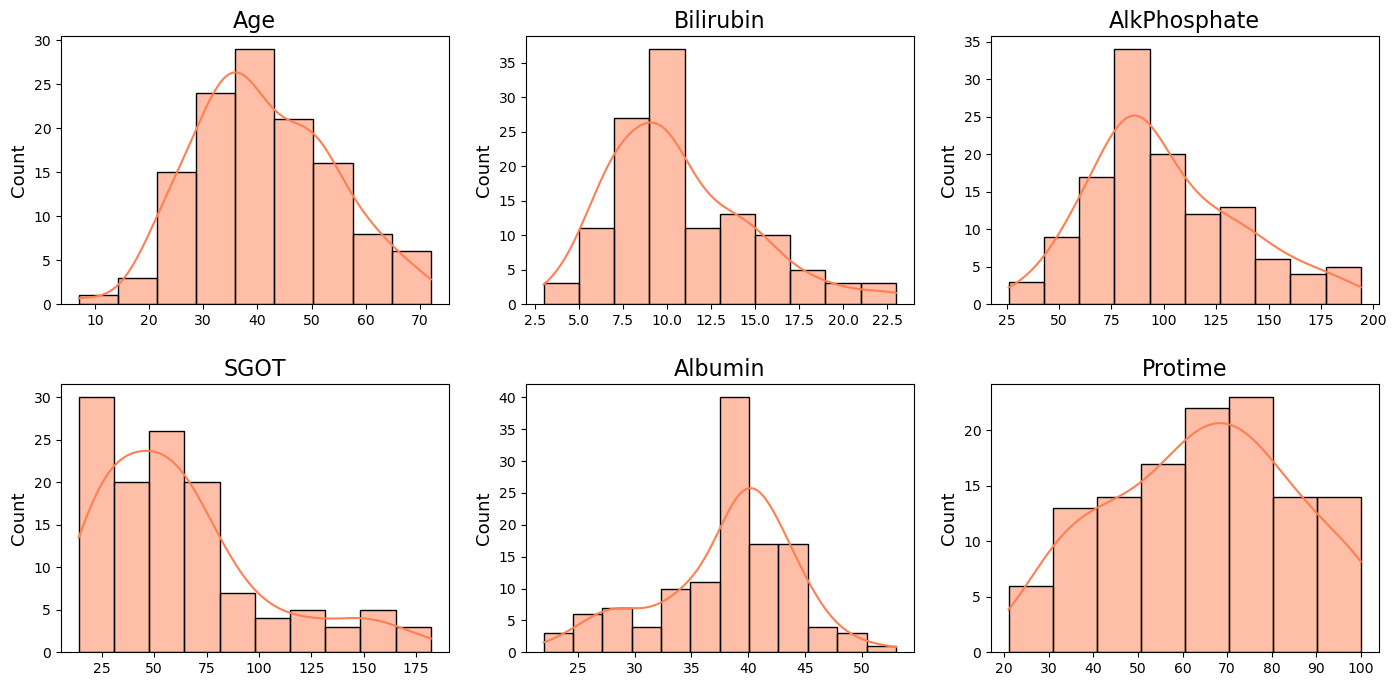

In [27]:
# Histogramas:
ptlib.plot_histograms(
    data=fe_train_num_df, x=list(fe_train_num_df.columns), kde=True, plot_style=None, color='coral',
    titles=list(fe_train_num_df.columns), titles_fontsize=16, xlabels=None, xlabels_fontsize=13, ylabels='Count',
    ylabels_fontsize=13, xtick_labelsize=10, ytick_labelsize=10, cols_nr=3, rows_nr=2, width=17, height=8,
    wspace=None, hspace=0.3
)

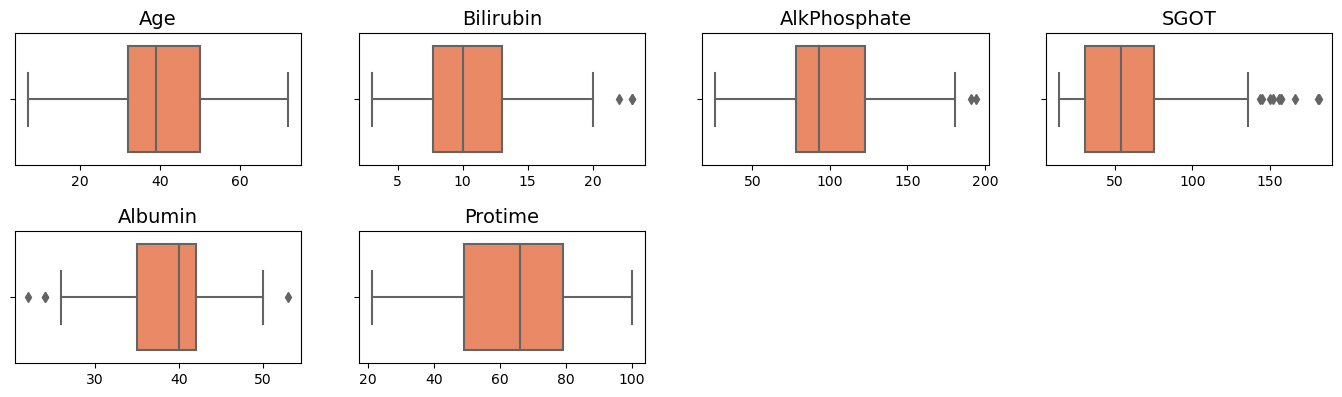

In [28]:
# Boxplots:
ptlib.plot_boxplots(
    x=list(fe_train_num_df.columns), data=fe_train_num_df, order=None, hue_order=None, colors='coral', plot_style=None,
    titles=list(fe_train_num_df.columns), titles_fontsize=14, xtick_labelsize=10, cols_nr=4, rows_nr=5, width=17, height=12,
    wspace=None, hspace=0.5
)

### Dados de treino: `train_set_v2`

In [29]:
# Criando o dataframe de treino:
train_set_v2 = pd.concat([train_cat_df, fe_train_num_df], axis=1)
# Resumo do dataframe:
train_set_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           123 non-null    int64  
 1   Gender          123 non-null    int64  
 2   Steroid         123 non-null    int64  
 3   Antivirals      123 non-null    int64  
 4   Fatigue         123 non-null    int64  
 5   Malaise         123 non-null    int64  
 6   Anorexia        123 non-null    int64  
 7   LiverBig        123 non-null    int64  
 8   LiverFirm       123 non-null    int64  
 9   SpleenPalpable  123 non-null    int64  
 10  Spiders         123 non-null    int64  
 11  Ascites         123 non-null    int64  
 12  Varices         123 non-null    int64  
 13  Histology       123 non-null    int64  
 14  Age             123 non-null    float64
 15  Bilirubin       123 non-null    float64
 16  AlkPhosphate    123 non-null    float64
 17  SGOT            123 non-null    flo

## <font color='blue'>6- Salvar os *dataframes* de `treino` e `teste`</font>

### Dados de Treino: `train_set_v1` e `train_set_v2`:

In [30]:
# Salvando o dataframe de treino "train_set_v1":
dslib.pickle_object_save (path=DATA_PATH, file="train_set_v1.pkl", object_name=train_set_v1)
# Salvando o dataframe de treino "train_set_v2":
dslib.pickle_object_save (path=DATA_PATH, file="train_set_v2.pkl", object_name=train_set_v2)

### Dados de Teste: `test_set`:

In [31]:
# Salvando o dataframe de teste "test_set":
dslib.pickle_object_save (path=DATA_PATH, file="test_set.pkl", object_name=test_set)

## <font color='black'>FIM</font>